In [1]:
import os
os.getcwd()

'C:\\Users\\Dell'

In [2]:

#classification problem
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#To load dataset
df=pd.read_csv("bank.csv")
#to show first 5 records
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [4]:
#Either customer will subscribe for deposit in bank or not according
#to different features 
#means this dataset is classification algorithm .
#target(output variable) : deposit


In [5]:
#how many rows and columns
df.shape

(11162, 17)

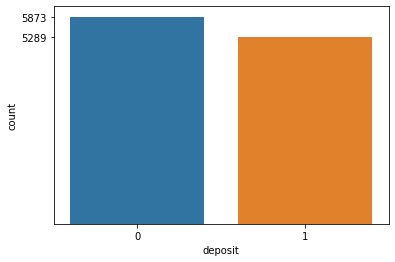

0    5873
1    5289
Name: deposit, dtype: int64


In [6]:
#How many samples of 1's and 0's of deposit column in given dataset
f=df['deposit'].value_counts()
sns.countplot(data=df,x='deposit')
plt.yticks(f)
plt.show()
print(f)

In [7]:
#first check null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

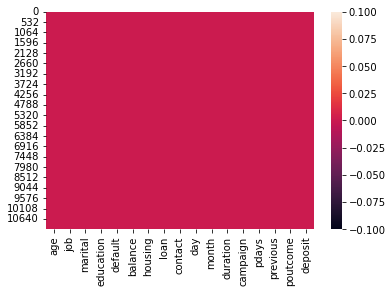

In [8]:
sns.heatmap(df.isnull())
plt.show()

In [9]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0
11161,34,9,1,1,0,0,0,0,0,9,5,628,1,-1,0,3,0


In [10]:
#cross check
#to check datatypes
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object

In [11]:
#secondly , check duplicates row 
df.duplicated().sum()

0

In [12]:
#select input and output from given dataset
X=df.drop('deposit',axis=1) #input 
Y=df['deposit'] #output

In [13]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3


In [14]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [15]:
X_train.shape,X_test.shape

((7813, 16), (3349, 16))

In [16]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
2506,74,5,1,0,0,0,0,0,1,13,1,562,2,-1,0,3
368,55,1,1,1,0,49,1,0,0,7,5,494,4,-1,0,3
2827,57,9,1,1,0,254,0,0,0,27,10,207,1,-1,0,3
9197,37,0,0,1,0,3975,1,0,0,11,8,163,2,-1,0,3
9910,56,4,2,2,0,6507,1,1,0,29,4,134,1,196,1,0


In [17]:
#First apply scaling on input data before train the data
#Apply standard scaler for input data training and testing

from sklearn.preprocessing import StandardScaler
#Create a object of StandardScaler class
ss=StandardScaler()
#means apply standard scaler for X_train data
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [18]:
X_train

array([[ 2.76552511,  0.15596991, -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [ 1.16824122, -1.0830671 , -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [ 1.33637636,  1.39500692, -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       ...,
       [-1.18565083, -0.77330785, -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [-0.00870481, -1.39282635,  1.27358436, ...,  3.07264515,
         4.3350541 , -0.47109973],
       [-0.42904267, -1.0830671 , -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872]])

In [19]:
df['job'].value_counts()

4     2566
1     1944
9     1823
0     1334
7      923
5      778
6      405
8      360
10     357
2      328
3      274
11      70
Name: job, dtype: int64

In [20]:
df['marital'].value_counts()

1    6351
2    3518
0    1293
Name: marital, dtype: int64

In [21]:
#classification algorithm 
#perform base line model 
#Logistic Regression :  fit() ,predict(),classification_report()
#DecisionTree classifier  : fit() ,predict(),classification_report()
#create user defined function 
def create_model(model): #model user defined object
    #train the model with 70% data
    model.fit(X_train,Y_train)
    #test the model with 30% data
    Y_pred=model.predict(X_test)
    #generate Report and confusion matrix
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model    

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [23]:
#first model perform with logistic regression 
#first call LogisticRegression class
from sklearn.linear_model import LogisticRegression

#create object of LogisticRegression class
lr=LogisticRegression()

In [24]:
#call function
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

[[1441  319]
 [ 359 1230]]


In [25]:
#IN logistic Regression , imp recall : got score 0.77(77%) 
#behind the region of less score :  model can be overfit
#bcoz in logistic regression , features is not select automatic 
#
#Next  apply DecisionTreeClassifier class : this algorithm select
#the input features automatic to predict the output .
#perform dataset with the help of DecisionTreeClassifier 
#call DecisionTreeClassifier class

from sklearn.tree import DecisionTreeClassifier 

In [26]:
#create the object of DecisionTreeClassifier class 
dt=DecisionTreeClassifier() #bydefault gini index method

In [27]:
#call function 
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1760
           1       0.78      0.76      0.77      1589

    accuracy                           0.79      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.79      0.78      3349

[[1423  337]
 [ 383 1206]]


In [28]:
#show the information gain of all input features 
IG=dt.feature_importances_
print("information Gain :",IG)

information Gain : [0.07959092 0.03498132 0.01953804 0.01270842 0.00045636 0.08533575
 0.04308551 0.00679842 0.06260287 0.07520806 0.09797489 0.35066058
 0.02102254 0.04792316 0.02596507 0.03614807]


In [29]:
dict={'Input':X.columns,'IG':IG}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)#descending order according to IG

,Input,IG
11,duration,0.350661
10,month,0.097975
5,balance,0.085336
0,age,0.079591
9,day,0.075208
8,contact,0.062603
13,pdays,0.047923
6,housing,0.043086
15,poutcome,0.036148
1,job,0.034981


In [30]:
#Limitation of DecisionTreeClassifier :1. most of time , model is overfit
#2. processing is slow

In [31]:
#create the tree 

from sklearn import tree
features=X.columns #input features
fig=plt.figure(figsize=(20,20))
#_=tree.plot_tree(dt,feature_names=features,filled=True)

<Figure size 1440x1440 with 0 Axes>

In [32]:
#We got less score 0.77(77%), its good but not excellent 
#Region behind less score , overfit 
#So to reduce overfit situation , apply Pruning Technique :
#There are 2 types of Pruning Technique :-  
#1. max_depth : Inbuilt parameter of DecisionTreeClassifier class
#2. min_samples_leaf : Inbuilt parameter of DecisionTreeClassifier class

In [33]:
#1. use max_depth :-  Note : the value of max_depth  parameter cannot 
#more than 8 (means 1-8)
#Create object of DecisionTreeClassifier class and passing the parameter
#max_depth (gini index)
dt1=DecisionTreeClassifier(max_depth=5,random_state=1)
#call function
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1760
           1       0.75      0.86      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349

[[1316  444]
 [ 228 1361]]


In [34]:
#show the information gain of all input features 
IG=dt1.feature_importances_
print("information Gain :",IG)

information Gain : [0.02684597 0.         0.         0.00285266 0.         0.00104007
 0.06633719 0.00376208 0.11972821 0.00351189 0.05243751 0.57641262
 0.00098173 0.05001305 0.04495027 0.05112675]


In [35]:
dict={'Input':X.columns,'IG':IG}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)#descending order according to IG

,Input,IG
11,duration,0.576413
8,contact,0.119728
6,housing,0.066337
10,month,0.052438
15,poutcome,0.051127
13,pdays,0.050013
14,previous,0.044950
0,age,0.026846
7,loan,0.003762
9,day,0.003512


In [36]:
#create the tree 

from sklearn import tree
features=X.columns #input features
fig=plt.figure(figsize=(20,20))
#_=tree.plot_tree(dt1,feature_names=features,filled=True)

<Figure size 1440x1440 with 0 Axes>

In [37]:
#max_depth=5 , got recall score =0.86(86%) in max_depth parameter

In [38]:
#2. pruning technique : min_samples_leaf  : value of this parameter
#can be >=45 and <=100
#Create object of DecisionTreeClassifier class and passing the parameter
##2. pruning technique : min_samples_leaf  : value of this parameter
# (gini index)
dt2=DecisionTreeClassifier(min_samples_leaf=45,random_state=1)
#call function
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1760
           1       0.78      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

[[1379  381]
 [ 204 1385]]


In [39]:
#show the information gain of all input features 
IG=dt2.feature_importances_
#print("information Gain :",IG)

dict={'Input':X.columns,'IG':IG}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)#descending order according to IG

,Input,IG
11,duration,0.496317
10,month,0.109126
8,contact,0.105357
6,housing,0.068329
15,poutcome,0.059375
13,pdays,0.044066
0,age,0.043918
14,previous,0.036294
5,balance,0.021749
9,day,0.005046


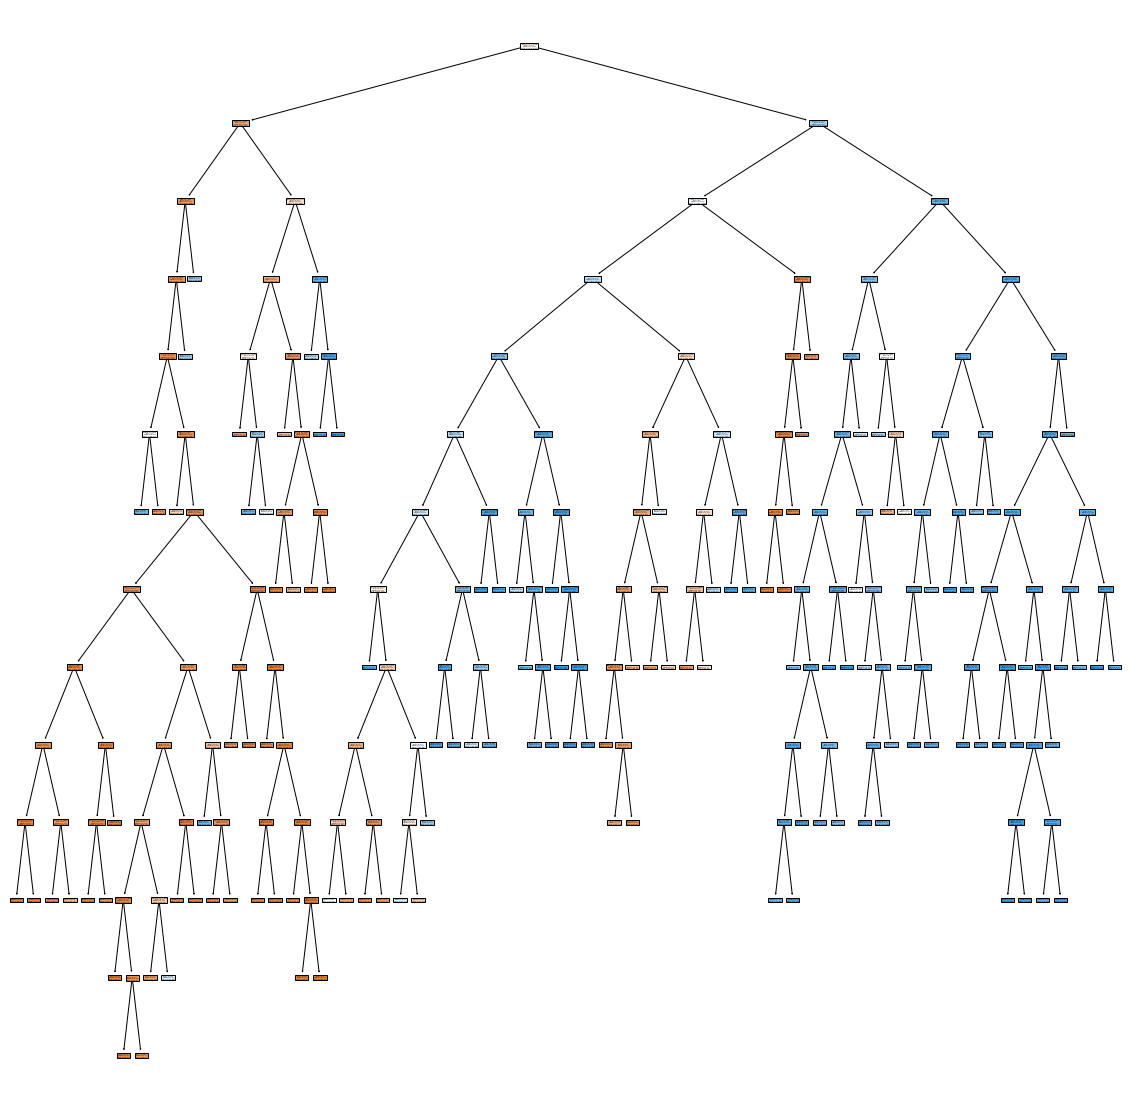

In [40]:
#create the tree 

from sklearn import tree
features=X.columns #input features
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

In [41]:
'''for i in range(45,101) : #start=45 stop=101-1=100 step=+1
    dt2=DecisionTreeClassifier(min_samples_leaf=i,random_state=1)
    #call function
    print("amples_leaf: ",i)
    dt2=create_model(dt2)'''

'for i in range(45,101) : #start=45 stop=101-1=100 step=+1\n    dt2=DecisionTreeClassifier(min_samples_leaf=i,random_state=1)\n    #call function\n    print("amples_leaf: ",i)\n    dt2=create_model(dt2)'

In [42]:
'''for i in range(1,9) : #start=1 stop=9-1=8 step=+1
    dt1=DecisionTreeClassifier(max_depth=i,random_state=1)
    #call function
    print("Max depth : ",i)
    dt1=create_model(dt1)'''

'for i in range(1,9) : #start=1 stop=9-1=8 step=+1\n    dt1=DecisionTreeClassifier(max_depth=i,random_state=1)\n    #call function\n    print("Max depth : ",i)\n    dt1=create_model(dt1)'

In [43]:
'''#use entropy method  (with max_depth)
for i in range(1,9):
    dt1=DecisionTreeClassifier(max_depth=i,random_state=1,
                           criterion='entropy')
    #bydefault  criterion='gini'
    #call function
    print("max depth : ",i)
    dt1=create_model(dt1)
    
#noter : gini index is best as compare to entropy'''

'#use entropy method  (with max_depth)\nfor i in range(1,9):\n    dt1=DecisionTreeClassifier(max_depth=i,random_state=1,\n                           criterion=\'entropy\')\n    #bydefault  criterion=\'gini\'\n    #call function\n    print("max depth : ",i)\n    dt1=create_model(dt1)\n    \n#noter : gini index is best as compare to entropy'

In [44]:
#conclusion :  got recall =.086 in max_depth=5 using giin index
#but got recall =0.87 in min_samples_leaf=45 using gini index 
#finally best method min_samples_leaf=45 using gini index  in this dataset


In [45]:
#Given samedataset to SVM 
#Suppose given dataset is linear . 
#call LinearSVC    : inbuilt class which define in svm outer class 
#SVC support vector classifier 
from sklearn.svm import LinearSVC

In [46]:
#create object of LinearSVC class
svc=LinearSVC(random_state=1)  #hard margin 

In [47]:
#call function
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

[[1444  316]
 [ 364 1225]]


In [48]:
#got recall for 1 : 0.77(77%) means it is good but not best . 
#suppose outlier found  in our dataset means model overfitted 
#so reduce the overfit of model or remove outlier from given dataset ,
#add some external error during training error means soft margin
#Means again create the object of class LinearSVC  and passing parameter
#C means error parameter , the value of C can be <=1

In [49]:
svc1=LinearSVC(random_state=1,C=0.01) #soft margin
#call function
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.80      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

[[1444  316]
 [ 363 1226]]


In [50]:
#conclusion : no any changes in  recall /accuracy if add error means 
#given dataset is non-linear .
#if data is non-linear , then given dataset to kernel function .
#1. polynomial kernel function : increase the dimension of data means 
#if 1D, so converts 2D and if 2D , then converts 3D and so on.
#2. radial basis kernel function

In [51]:
#1. polynomial kernel function :  to increase the dimension of data 
#inbuilt class SVC  : support vector classifier which define in 
#sklearn.svm
from sklearn.svm import SVC
#SVC support vector classifier

In [52]:
#create the object of SVC class
svc1=SVC(random_state=1,kernel="poly") #give data in polynomial kernel 

In [53]:
#call function
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1760
           1       0.79      0.80      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349

[[1417  343]
 [ 311 1278]]


In [54]:
#here racall increase from 0.77 to 0.80  , this is good but not better
#Now apply radial basis kernel function

#create the object of SVC class
svc2=SVC(random_state=1,kernel="rbf") #give data in radial basis kernel 

#call function
#svc2=create_model(svc2)

In [55]:
#best algorithm for bank.csv : DecisionTreeClassifier with Pruning Tech 
#min_samples_leaf =45  , get recall=87%(0.87)

In [56]:
#Use ENsembling Technique : -
#1. RandomForestTree : use DecisionTreeClassifier Algorithm 
from sklearn.ensemble import RandomForestClassifier
#RandomForestClassifier inbuilt class 

In [57]:
#create object of RandomForestClassifier class and passing some parameters
rfc=RandomForestClassifier(n_estimators=53,random_state=1)
#n_estimators : no. of algorithm (>=10 and <=100) 
#algorithm : DecisionTreeClassifer 

In [58]:
#train,test the model with RandomForestClassifier algo. and generate
#the report , call function
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1760
           1       0.81      0.88      0.84      1589

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.85      0.84      0.84      3349

[[1430  330]
 [ 195 1394]]


In [59]:
#show the information gain of all input features 
IG=rfc.feature_importances_
#print("information Gain :",IG)

dict={'Input':X.columns,'IG':IG}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)#descending order according to IG

,Input,IG
11,duration,0.363820
5,balance,0.089140
0,age,0.086641
10,month,0.082427
9,day,0.071946
13,pdays,0.051120
1,job,0.039926
8,contact,0.038963
15,poutcome,0.037774
6,housing,0.033435


In [60]:
#apply Pruning technique : 
#Appky max_depth <=8 
#create object of RandomForestClassifier class and passing some parameters
rfc1=RandomForestClassifier(n_estimators=53,random_state=1,max_depth=8)
#call function
rfc1=create_model(rfc1)

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1760
           1       0.81      0.86      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.84      0.83      3349
weighted avg       0.84      0.83      0.83      3349

[[1430  330]
 [ 226 1363]]


In [61]:
'''for i in range(1,9):
    rfc1=RandomForestClassifier(n_estimators=53,random_state=1,
                                max_depth=i)
    print(i)
    #call function
    rfc1=create_model(rfc1)'''

'for i in range(1,9):\n    rfc1=RandomForestClassifier(n_estimators=53,random_state=1,\n                                max_depth=i)\n    print(i)\n    #call function\n    rfc1=create_model(rfc1)'

In [62]:
'''for i in range(45,101):
    rfc1=RandomForestClassifier(n_estimators=53,random_state=1,
                                min_samples_leaf=i)
    print(i)
    #call function
    rfc1=create_model(rfc1)'''

'for i in range(45,101):\n    rfc1=RandomForestClassifier(n_estimators=53,random_state=1,\n                                min_samples_leaf=i)\n    print(i)\n    #call function\n    rfc1=create_model(rfc1)'

In [63]:
#SVM : radial basis : recall : 87%
#Random Forest Classifier : recall 88%


In [64]:
'''for n in range(10,101):
    rfc=RandomForestClassifier(n_estimators=n,random_state=1)
    print("No. of trees : ",n)
    rfc=create_model(rfc)'''

'for n in range(10,101):\n    rfc=RandomForestClassifier(n_estimators=n,random_state=1)\n    print("No. of trees : ",n)\n    rfc=create_model(rfc)'

In [65]:
X_train.shape

(7813, 16)

In [66]:
from sklearn.ensemble import AdaBoostClassifier

In [67]:
#create the object of AdaBoostClassifier class
#ADA Boost creates decision stump (means one root node and 2 leaf node)
#leaf node : no any childs
ada=AdaBoostClassifier(n_estimators=3,random_state=1)
#call function
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1760
           1       0.72      0.80      0.76      1589

    accuracy                           0.76      3349
   macro avg       0.76      0.76      0.76      3349
weighted avg       0.76      0.76      0.76      3349

[[1262  498]
 [ 310 1279]]


In [68]:
for i in range(1,17):
    ada=AdaBoostClassifier(n_estimators=i,random_state=1)
    print("Decision Stump : ",i)
    #call function
    ada=create_model(ada)

Decision Stump :  1
              precision    recall  f1-score   support

           0       0.79      0.62      0.69      1760
           1       0.66      0.81      0.73      1589

    accuracy                           0.71      3349
   macro avg       0.72      0.72      0.71      3349
weighted avg       0.73      0.71      0.71      3349

[[1092  668]
 [ 296 1293]]
Decision Stump :  2
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1760
           1       0.72      0.72      0.72      1589

    accuracy                           0.73      3349
   macro avg       0.73      0.73      0.73      3349
weighted avg       0.73      0.73      0.73      3349

[[1313  447]
 [ 450 1139]]
Decision Stump :  3
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1760
           1       0.72      0.80      0.76      1589

    accuracy                           0.76      3349
   macro avg  

In [69]:
#check impotant features
dict={'Input':X.columns,'IG':ada.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)

,Input,IG
11,duration,0.3125
13,pdays,0.1250
15,poutcome,0.1250
0,age,0.0625
5,balance,0.0625
6,housing,0.0625
7,loan,0.0625
8,contact,0.0625
10,month,0.0625
12,campaign,0.0625


In [70]:
X_train.shape

(7813, 16)

In [71]:
#2. Gradient Boosting(GB) : - 
#Its basically focus on short comings error  means fully grown tree 
#error means miss-classification /total no. of samples
#2. gradient Boost technuique : second tech. of Boosting
#Ensembling technique 
# GB  : - its create a fully grown tree.this algorithm is focus 
#on short comings  short comings means error

In [72]:
#call GradientBoostingClassifier class from following package
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
#create the object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(random_state=1,n_estimators=71)
#n_estimators inbuilt parameter of GradientBoostingClassfier class means
#no. of iterations,min=10 and max=100
#n_estimators>=10 and <=100

In [74]:
''''
for i in range(10,101):
    gbc=GradientBoostingClassifier(random_state=1,n_estimators=i)
    print("no. of iterations: ",i)
    #call function
    gbc=create_model(gbc)
    ''''

SyntaxError: EOL while scanning string literal (404600494.py, line 7)

In [77]:
#check impotant features
dict={'Input':X.columns,'IG':gbc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)

NotFittedError: This GradientBoostingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
#3. Extreame Gradient Boosting  : 3rd technique of Boosting 
#This is better version of gradient boosting . . short form XGB 
#why call better version of Gradient Boosting : -
#1. XG Bossting use : - Multithreading technique(parallel processing)
#2. It takes less memory space and faster 
#3. It is very useful to handle huge amt of data .Its deal large amount of data
#4. Its handle outlier because have inbuilt capability
#5. Its handle null values 
#6. Its handle automatic overfitting situation .

In [76]:
#install the external package from pythons community first for XGBoost
#!pip install xgboost

In [78]:
from xgboost import XGBClassifier
#XGBClassifier inbuilt class which define in xgboost package

In [83]:
#create object of class XGBClassifier
xgb=XGBClassifier(n_estimators=21,reg_alpha=1)
#reg means regularisation and alpha or lambda:
#hyperparamter
#1 means true
#call function
xgb=create_model(xgb)

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1760
           1       0.82      0.88      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

[[1454  306]
 [ 197 1392]]


In [81]:
''''
for i in range(10,100):
    xgb=XGBClassifier(n_estimators=i,reg_alpha=1)
    print("no of iterations",i)
    #call function
    xgb=create_model(xgb)
''''    

SyntaxError: EOL while scanning string literal (3094479276.py, line 7)